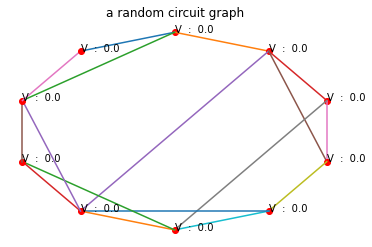

In [2]:
import hashlib
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

def plotGraphInCircle( G, title = "A rough plot of a graph", edgeLabel=None ):
    
    n_keys  = len(list(G.keys()))
    for i_key in G.keys():
        
        ###draw a red circle at x,y to show the node
        angle = 2*np.pi * i_key / n_keys
        x, y  = np.sin(angle), np.cos(angle)
        plt.plot( x, y, "ro" ) 
        
        ##try and show whatever info comes with the node as text.
        h_text = 0.0
        for property_key in G[i_key].keys():
            if property_key == "links":
                continue
            else:
                plt.text(x, y+h_text, "%s  :  %s" %\
                         (str(property_key), str(G[i_key][property_key])))
                h_text -= 0.08
        
        ##draw a line segment for each link that the node has
        for j_key in list(G[i_key]["links"].keys()):
            if j_key < i_key: 
                continue
            angle   = 2*np.pi * j_key / n_keys
            xx, yy  = np.sin(angle), np.cos(angle)
            if edgeLabel is not None:
                plt.plot([x,xx], [y,yy], "-",\
                        label="%s=%.2f" % (edgeLabel, G[i_key]["links"][j_key]) )
            
    plt.title(title)
    #plt.legend(loc="upper right")
    plt.gca().axis('off')
    plt.show()

def createRandomCircuit():
    G = {}
    
    ##build a circular graph with links in both directions at each node.
    for i in range(10):
        G[i] = {"V": 0. ,\
                "links": {(i-1)%10: 1.,\
                          (i+1)%10: 1.} }
    
    ##add some extra random links.
    for i in range(10):
        j = np.random.randint(10)
        G[j]["links"][i]  = 1.  ##link j and i with Resistance = 1.
        G[i]["links"][j]  = 1.  ##link i and j with Resistance = 1.
    
    return G



G = createRandomCircuit()

## output
plotGraphInCircle( G, "a random circuit graph", edgeLabel="R" )

In [3]:
## fix one potential to 1V and one to 0V
G[9]["V"] = 1.
G[9]["fixed"] = "true"
G[8]["V"] = 0.
G[8]["fixed"] = "true"

## define our potential lists to keep track of change
oldPotential = []
newPotential = [] 

for i in range(10):
    oldPotential.append(G[i]["V"])
    newPotential.append(G[i]["V"])

In [4]:
## function definitions, for calculating that ugly formula
def numerator(node):
    sum = 0
    for j in G[node]["links"]:
        product = 1
        for k in G[node]["links"]:
            if k!=j:
                product *= G[node]["links"][k]
        sum += G[j]["V"] * product
    return sum

def denominator(node):
    sum = 0
    for j in G[node]["links"]:
        product = 1
        for k in G[node]["links"]:
            if k!=j:
                product *= G[node]["links"][k]
        sum +=  product
    return sum

def potentialUpdate(node):
    if "fixed" not in G[node]:
        return numerator(node) / denominator(node)
    elif "fixed" in G[node]:
        return G[node]["V"]
    
def iterator(G):
    i = 0
    while i < 100:
        node = random.randint(0,9)
        G[node]["V"] = potentialUpdate(node) ## update potentials
        i +=1
    return G 

def sumOfSquaresCalculator(oldPotential, newPotential): ## pretty much what it says
    sum = 0
    for i in range(len(oldPotential)):
        sum += (oldPotential[i]-newPotential[i])**2
    return sum

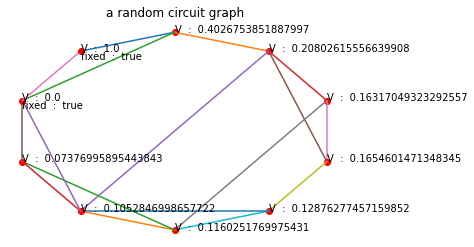

In [6]:
## main loop
iterationNumber = 0
sumOfSquares = 1
while sumOfSquares > 10**(-6):
    G = iterator(G)
    iterationNumber += 1 ## keep track of iteration number
    if iterationNumber > 100: ## failsafe check (thanks KyungHoon)
        print("break")
        break
    for i in range(len(newPotential)): ## update the new potentials lisst
        newPotential[i] = G[i]["V"]
    sumOfSquares = sumOfSquaresCalculator(oldPotential,newPotential)
    for i in range(len(oldPotential)):
        oldPotential = newPotential ## add end of the loop, set the old pot to new pot in order to prepare for the next iteration
    plotGraphInCircle( G, "a random circuit graph" , edgeLabel="R" ) ## output